## Importing Data and Necessary Packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

In [2]:
#Creating a python array of state abbreviations
#Taken from https://gist.github.com/JeffPaine/3083347
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
"SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "US"]


statesfull=['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut',
            'District of Columbia','Delaware','Florida','Georgia',
            'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine',
            'Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska',
            'Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota',
            'Ohio','Oklahoma','Oregon','Pennsylvania',
            'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
            'Virginia','Washington','West Virginia','Wisconsin','Wyoming','Puerto Rico']

In [3]:
def createDataFrame(emptySeries, arrayNames, textfileName, index, Column, skiprows=[0,1,2]):
    """
    Makes a dataframe with specific language information from excel file
    """
    i=0
    for area in arrayNames:

        df = pd.read_excel(textfileName, area, skiprows=skiprows).dropna()

        #dictionary[area] = df.loc[dictionaryindex1:dictionaryindex1,Column]
        emptySeries.set_value(i,df.loc[index, Column])
        i+=1


In [4]:
def plotFigure(english_speakers, other_speakers):
    """
    Takes the number of only English speakers and number of speakers of other languages, per Census file. 
    Returns two graphs with number of only English speakers and number of speakers of 
    other languages as normalized percentages of total population of those states. 
    """
    english_speakers_normalized = english_speakers/(english_speakers+other_speakers)
    other_speakers_normalized = other_speakers/(english_speakers+other_speakers)

    plt.figure(figsize=(20, 3))
    for i in range(0,50): 
        plt.bar(i, english_speakers_normalized[i])
        plt.autoscale(enable=True)
        plt.xticks(range(0,50), states[0:50])
        plt.title("Normalized Fraction of Solely English Speakers")
        plt.xlabel("State")
        plt.ylabel("Fraction of Solely English Speakers")

    plt.figure(figsize=(20, 3))
    for i in range(0,50):
        plt.bar(i, other_speakers_normalized[i])
        plt.autoscale(enable=True)
        plt.ylim([0.0,1.0])
        plt.xticks(range(0,50), states[0:50])
        plt.title("Normalized Percentage of Other Language Speakers")
        plt.xlabel("State")
        plt.ylabel("Fraction of Other Language Speakers")

In [ ]:
def plotLineGraph(otherspeakers2000, otherspeakers2006, otherspeakers2009, state):
    """
    Takes the information about non-English speakers in the 2000, 2006-2008 and 2009-2013 periods as well
    as which state you want to analyze. Returns a line graph
    which displays number of total speakers as a function of time
    """
    
    indexstate = states.index(state)
    years = [2000,2006,2009]
    state_num = [otherspeakers2000[indexstate],otherspeakers2006[indexstate], otherspeakers2009[indexstate]]
    plt.plot(years, [x / 1000 for x in state_num], '-o', label = str(state)) #dividing by 1000
    plt.title("Normalized Percentage of Other Language Speakers")
    plt.xlabel("Year")
    plt.ylabel("non-English Speakers (thousands)")
    return str(state)

    
    

# Bar Graphs of Other Language Speakers and English Language Speakers in Every State over Time

In [ ]:
## This isn't working yet

#English and Non-English Speakers for 2000, Creating dictionary and arrays
totallanguage_dict_00 = dict.fromkeys(states)
english2000=pd.Series()
other2000=pd.Series()
 

createDataFrame(english2000, states, "/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx", 0, totallanguage_dict_00,"Number of speakers")
    
createDataFrame(other2000, states, "/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx", 1, totallanguage_dict_00,"Number of speakers")

In [5]:
#English and Non-English Speakers for 2006, Creating dictionary and arrays
#totallanguage_dict_06 = dict.fromkeys(states)
english2006=pd.Series()
other2006=pd.Series()
txtfile2006 = "/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/DetailedLanguageSpoken_State_20062008.xls"

createDataFrame(english2006, states, txtfile2006, 1,"Number of speakers", skiprows=[0,1,2])
    
createDataFrame(other2006, states, txtfile2006, 2,"Number of speakers", skiprows=[0,1,2])

/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [6]:
#English and Non-English Speakers for 2009, Creating dictionary and arrays
#totallanguage_dict_09 = dict.fromkeys(statesfull)
english2009=pd.Series()
other2009=pd.Series()
txtfile2009 =  "/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_State_2009-2013.xls"

#things that are different about this file : skiprows is [0,1,2,3], column is "NumberofSpeakers1" and states is statesfull
createDataFrame(english2009, statesfull, txtfile2009, 1,"Number of speakers1", skiprows=[0,1,2,3])
    
createDataFrame(other2009, statesfull, txtfile2009, 2, "Number of speakers1", skiprows=[0,1,2,3])

/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
statesfull.index('Pennsylvania')

In [ ]:
english2009[38]

In [ ]:
other2009[38]

Plotting the Bar Graphs of the Different Time Periods

In [ ]:
plotFigure(english2006, other2006 )

These graphs show on top the portion of the population for each state that only speaks English, and on the bottom the portion of the population for each state that speaks a language other than English. 

We see that a large portion of the population of all U.S. states only speak English. 

In [ ]:
othernorm2006 = (other2006[0:50]/(english2006[0:50]+other2006[0:50])) 
moreothernorm2006 =othernorm2006 > 0.2 #states which have larger fraction of non-English speakers
statesofinterest=[i for i, x in enumerate(moreothernorm2006) if x]
for i in statesofinterest:
    print(states[i])

In [ ]:
print(str(states[othernorm2006.idxmin()])) #State in 2006 with smallest number of non-English speakers
print(str(othernorm2006.min()))

In [ ]:
lessothernorm2006 = othernorm2006 < 0.1
statesofinterest=[i for i, x in enumerate(lessothernorm2006) if x]  #states which have smaller fraction of non-English speakers
for i in statesofinterest:
    print(states[i])

In [ ]:
plotFigure(english2009, other2009 )

In [ ]:
plt.figure()
AL = plotLineGraph([2,5,6,10,23,12], other2006, other2009, "AL")
AK = plotLineGraph([2,5,6,10,23,12], other2006, other2009, "AK")
AZ = plotLineGraph([2,5,6,10,23,12], other2006, other2009, "AZ")
plt.legend()

## Amount of Non-English Speakers per County in Potentially Interesting States

Next we will look at counties of states which had some of the most extreme ratios of speakers of only english to speakers of other languages. 

In [108]:
def createCountyDataFrame(emptySeries, emptySeries2, arrayNames, textfileName, index):
    """
    Makes a dataframe with specific language information from excel file
    """
    i=0
    x1 = pd.ExcelFile(textfileName)
    sheetnames = x1.sheet_names
    for sheet in sheetnames:
        if any(x in sheet for x in arrayNames):
            df = pd.read_excel(textfileName,sheet, skiprows=[0,1,2,3]).dropna()
            #dictionary[area] = df.loc[1:2,"Number of speakers"]
            emptySeries.set_value(i,df["Number of speakers1"][index])
            emptySeries2.set_value(i, sheet)
            i+=1

In [109]:
def plotCounty(statename, countylist, numberpercounty):
    while True:
        if len(numberpercounty)>5:
            plt.figure(figsize=(20, 3))
            break
        else:
            plt.figure()
            break
        
    for i in range(0,len(countylist)): 
        plt.bar(i, numberpercounty[i])
        plt.autoscale(enable=True)
        plt.xticks(range(0,len(countylist)), countylist[0:len(countylist)],  rotation=70)
        plt.title("Other Language Speakers in "+str(statename)+" by County")
        plt.xlabel("County")
        plt.ylabel("Number of Other Language Speakers")

In [110]:
stateswerelookingat = ["AZ", "CA", "HI", "WV"]
stateswerelookingatfull = ["Arizona", "California", "Hawaii"]
county = pd.Series()
otherspeakers_counties = pd.Series()
txtcounties2009 = "/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_County_2009-2013.xls"
createCountyDataFrame(otherspeakers_counties, county,stateswerelookingat,txtcounties2009 , 1)

/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [111]:

otherspeakers2009 = pd.DataFrame(dict(county = county, otherspeakers_counties = otherspeakers_counties)).reset_index()

In [112]:
otherspeakers2009

,index,county,otherspeakers_counties
0,0,"Maricopa County, AZ",2661566
1,1,"Navajo County, AZ",62532
2,2,"Pima County, AZ",661590
3,3,"Alameda County, CA",817782
4,4,"Contra Costa County, CA",666701
5,5,"Fresno County, CA",484636
6,6,"Kern County, CA",448868
7,7,"Los Angeles County, CA",3991721
8,8,"Monterey County, CA",183807
9,9,"Orange County, CA",1558350


### Arizona Counties

Arizona seemed to have a high ratio of non-English speakers to solely English speakers. 

In [113]:
#creating series and calculating non-English speakers per county
AZcounty = pd.Series()
otherspeakers_AZcounties = pd.Series()
createCountyDataFrame(otherspeakers_AZcounties, AZcounty,["AZ"],txtcounties2009 , 1)


/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [114]:
AZcounty 

0    Maricopa County, AZ
1      Navajo County, AZ
2        Pima County, AZ
dtype: object

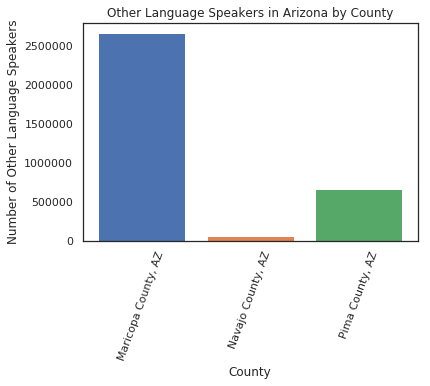

In [115]:
plotCounty("Arizona", AZcounty, otherspeakers_AZcounties)

It looks like most non-English language speakers come from Maricopa county. There is a large difference between the number of non-English speakers in Maricopa county and Navajo county.

### California Counties
California contained the greatest percentage of non-English speakers. Are all counties equally contributing to this statistic?

In [ ]:
#creating series and calculating non-English speakers per county
CAcounty = pd.Series()
otherspeakers_CAcounties = pd.Series()
createCountyDataFrame(otherspeakers_CAcounties, CAcounty,["CA"],txtcounties2009 , 1)

In [ ]:
plotCounty("California", CAcounty, otherspeakers_CAcounties)

It looks like the answer is no. Los Angeles has substantially more non-English speakers than any other California county.

### Kansas Counties

In [ ]:
#creating series and calculating non-English speakers per county
KScounty = pd.Series()
otherspeakers_KScounties = pd.Series()
createCountyDataFrame(otherspeakers_KScounties, KScounty,["KS"],txtcounties2009 , 1)

In [ ]:
plotCounty("Kansas", KScounty, otherspeakers_KScounties)

### New York Counties

New York is known for being the first place to which immigrants come. Let's see how many more immigrants New York, New York has than upstate New York counties.

In [ ]:
#creating series and calculating non-English speakers per county
NYcounty = pd.Series()
otherspeakers_NYcounties = pd.Series()
createCountyDataFrame(otherspeakers_NYcounties, NYcounty,["NY"],txtcounties2009 , 1)

In [ ]:
plotCounty("New York", NYcounty, otherspeakers_NYcounties)

We were not expecting the number of non-English speakers in New York counties to be spread out to this extent. However, New York New York, Kings County, Queens county and Bronx county are all adjacent to each other, and all part of the major urban sprawl of the city of New York. If we group them together, we should find that New York City is contributing greatly to the number of non-English speakers in New York State.

In [ ]:
#sum the NYC counties together
NYCcount = otherspeakers_NYcounties["New York County, NY"] + otherspeakers_NYcounties["Queens County, NY"] + otherspeakers_NYcounties["Kings County, NY"]
# replace NYC counties with NYC
replace("condition1", "")


### West Virginia Counties

In [ ]:
WVcounty = pd.Series()
otherspeakers_WVcounties = pd.Series()
createCountyDataFrame(otherspeakers_WVcounties, WVcounty,["WV"],txtcounties2009 , 1)

In [ ]:
plotCounty("West Virginia", WVcounty, otherspeakers_WVcounties)

Things to try : 
-plotting this bar graph by urban area
-plotting this bar graph for counties that look like they have extreme ratios( ie AL, CA) to see if ratios are consistent or varied inside these states

# Analyzing Counties by the Ratios of Different Languages Spoken in Them

However, how diverse are the most linguistically diverse counties actually? We stipulate that if all the different languages spoken in a community are, for example, European languages, that changes the perception of how diverse the community is. 

In [105]:
def createListofLanguageGroups(textfileName, arrayNames, column1, skiprows):
    """
    takes in census year and returns dataframe which contains language groups and corresponding number of respondents
    who speak a language in the language group
    
    column is included because on 2006 the column is "Number of speakers" but on 2009, it's "Number of speakers1"
    """
    if textfileName == txtfile2009:
         languagegroupstolookfor = ["SPANISH AND SPANISH CREOLE", ".Italian","..German", ".Scandinavian languages",
                              "ASIAN AND PACIFIC ISLAND LANGUAGES",".Navajo", ".Other Native North American languages"]
    elif textfileName == txtfile2006:
        languagegroupstolookfor = ["\nSPANISH AND SPANISH CREOLE", ".Italian",".German", ".Scandinavian languages",
                                  "\nASIAN AND PACIFIC ISLAND LANGUAGES",".Navajo", ".Other Native North American languages"]
    
    languagesperState = pd.DataFrame(np.nan, index=np.array(arrayNames), columns=np.array(languagegroupstolookfor)) #row index will be language and column index will be column index

    languageGroups = ["German, Scandinavian, Italian", "Spanish", "North American Languages", "Asian and Pacific Island Languages" ]

    for area in arrayNames:

        df = pd.read_excel(textfileName, area, skiprows=skiprows).dropna()
        
        for language in languagegroupstolookfor:

            try:
                num = df[df['Unnamed: 0']==language][column1].item() #select row from langauges column which has certain language
            except:
                num = 0
            languagesperState.loc[area, language] = num
            
    languagesperState['German, Scandinavian, Italian'] = languagesperState.iloc[:, 1:4].sum(axis=1)
    languagesperState['Native North American'] = languagesperState.iloc[:, 5:7].sum(axis=1)
    languagesperState.drop([".Italian","..German", ".Scandinavian languages",".Navajo", ".Other Native North American languages"], axis = 1, inplace = True) 
 
    return languagesperState

In [90]:
def createCountiesList(statename):
    textfileName =  "/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_County_2009-2013.xls"
    countyNames = []
    x1 = pd.ExcelFile(textfileName)
    sheetnames = x1.sheet_names                        
    for sheet in sheetnames:
        if any(x in sheet for x in statename):
            
            countyNames.append(str(sheet))
    #countynamespd = pd.Series(countyNames)   
    return countyNames

In [103]:
def createListofLanguageGroupsCounties(statename):
    """
    takes in census year and returns dataframe which contains language groups and corresponding number of respondents
    who speak a language in the language group
    
    column is included because on 2006 the column is "Number of speakers" but on 2009, it's "Number of speakers1"
    """
    textfileName =  "/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_County_2009-2013.xls"
    languagegroupstolookfor = ["SPANISH AND SPANISH CREOLE", ".Italian","..German", ".Scandinavian languages",
                                 "ASIAN AND PACIFIC ISLAND LANGUAGES",".Navajo", ".Other Native North American languages"]
    countyNames = createCountiesList(statename)
    languagesperState = pd.DataFrame(np.nan, index= np.array(countyNames), columns=np.array(languagegroupstolookfor)) #row index will be language and column index will be column index

    languageGroups = ["German, Scandinavian, Italian", "Spanish", "North American Languages", "Asian and Pacific Island Languages" ]

    x1 = pd.ExcelFile(textfileName)
    sheetnames = x1.sheet_names                        
    for sheet in sheetnames:

        if sheet in countyNames:

            df = pd.read_excel(textfileName, sheet, skiprows=[0,1,2,3]).dropna()
            
            for language in languagegroupstolookfor:
                
                try:
                    num = df[df['Unnamed: 0']==language]["Number of speakers1"].item() #select row from langauges column which has certain language
                    
                except:
                    num = 0
                
                languagesperState.loc[sheet, language] = num

    languagesperState['German, Scandinavian, Italian'] = languagesperState.iloc[:, 1:4].sum(axis=1)
    languagesperState['Native North American'] = languagesperState.iloc[:, 5:7].sum(axis=1)
    languagesperState.drop([".Italian","..German", ".Scandinavian languages",".Navajo", ".Other Native North American languages"], axis = 1, inplace = True) 
 

    return languagesperState

In [106]:
languagesperState2009 = createListofLanguageGroups(txtfile2009, statesfull[0:50],  "Number of speakers1", skiprows=[0,1,2,3])

In [107]:
languagesperState2009

,SPANISH AND SPANISH CREOLE,ASIAN AND PACIFIC ISLAND LANGUAGES,"German, Scandinavian, Italian",Native North American
Alabama,151384.0,36312.0,11998.0,746.0
Alaska,22425.0,35935.0,4822.0,31868.0
Arizona,1230732.0,113544.0,33483.0,110661.0
Arkansas,143540.0,26769.0,6650.0,908.0
California,10105424.0,3375028.0,197025.0,7390.0
Colorado,565058.0,91051.0,34293.0,5181.0
Connecticut,371024.0,76859.0,50339.0,260.0
District of Columbia,44457.0,10990.0,5200.0,108.0
Delaware,57255.0,16609.0,5567.0,156.0
Florida,3640750.0,269329.0,128076.0,2069.0


In [104]:
createListofLanguageGroupsCounties(["WA"])

,SPANISH AND SPANISH CREOLE,ASIAN AND PACIFIC ISLAND LANGUAGES,"German, Scandinavian, Italian",Native North American
"Clark County, WA",19629.0,13171.0,2376.0,111.0
"King County, WA",121960.0,203449.0,18268.0,669.0
"Pierce County, WA",44003.0,39504.0,7723.0,341.0
"Snohomish County, WA",41659.0,46991.0,4308.0,360.0
